In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

In [3]:
x = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

In [6]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error: 33596915.85
R-squared: 0.78


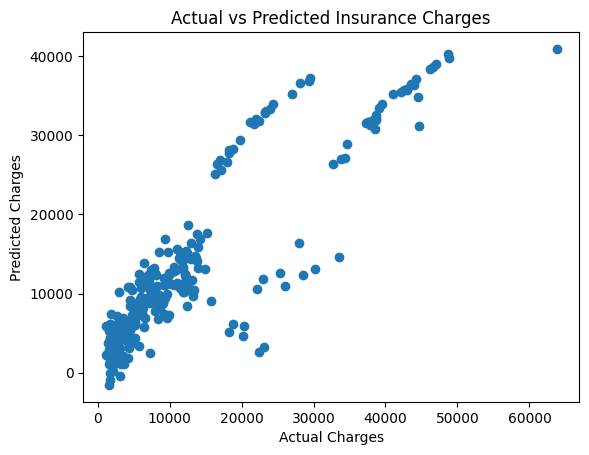

In [7]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()